In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)
plt.style.use('ggplot')
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [117]:
df = pd.read_csv("DF_clean.csv")

In [118]:
df = df.dropna()
df =df.drop("Unnamed: 0", axis= 1)

In [119]:

df.replace(to_replace="Yes", value=1, inplace=True)
df.replace(to_replace="No", value=0, inplace=True)

In [120]:
df.head()

,PersonID,UseInternet,Electronic_SelfHealthInfo,Electronic_HealthInfoSE,Electronic_BuyMedicine,Electronic_LookedAssistance,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,HaveDevice_Cat,...,TimesModerateExercise,TimesStrengthTraining,Age,OccupationStatus,MaritalStatus,Education,SpeakEnglish,TotalHousehold,SelfGender,IncomeRanges
1,80000008-01,0,0,0,0,0,0,0,0,0,...,0,0.0,4,4.0,5.0,1.0,2,1,0,0
2,80000013-01,1,1,0,0,0,0,0,0,1,...,1,1.0,2,1.0,1.0,5.0,2,3,0,5
3,80000014-01,1,1,1,0,1,1,0,0,2,...,1,1.0,3,1.0,1.0,6.0,2,2,0,6
4,80000019-02,1,1,1,1,0,0,0,1,2,...,0,0.0,3,5.0,1.0,4.0,2,2,1,1
5,80000028-01,1,1,1,1,0,1,1,1,1,...,1,2.0,3,5.0,1.0,5.0,2,2,0,5


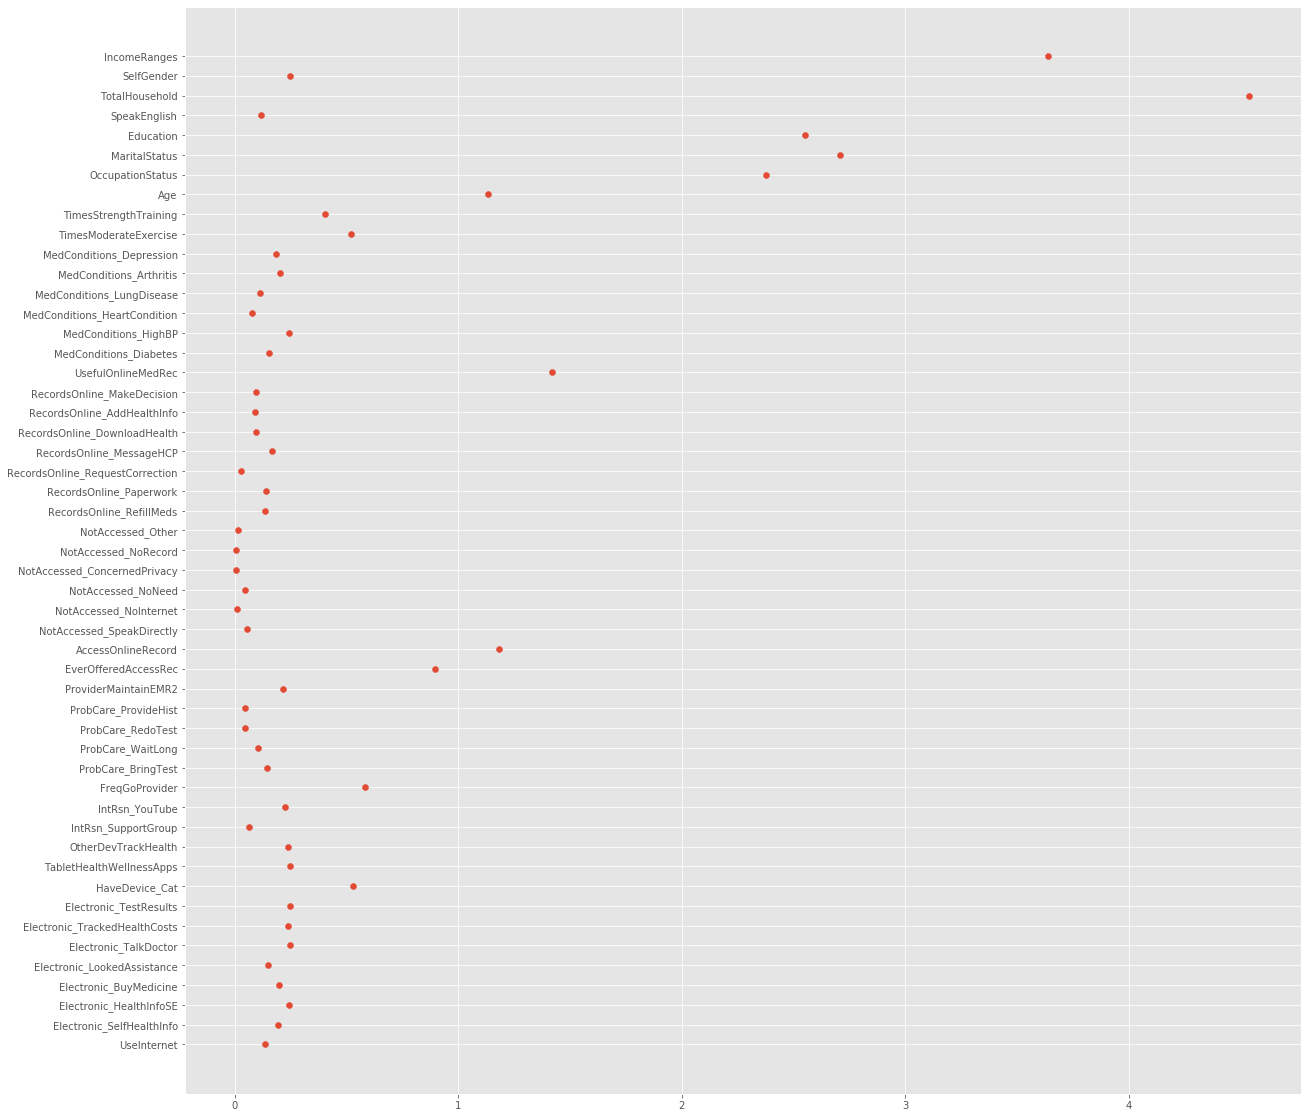

In [81]:
plt.scatter( pd.DataFrame(df.var()),pd.DataFrame(df.var()).index)
plt.savefig("variances.png")

### Random Forest Regressor:

only accepts numeric values, drop PersonID as not imp here. 

In [179]:
#df = df.drop(['PersonID'], axis=1)
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['AccessOnlineRecord'], axis=1)
X =pd.get_dummies(X)
Y = df.AccessOnlineRecord

In [154]:
X.columns

Index(['UseInternet', 'Electronic_SelfHealthInfo', 'Electronic_HealthInfoSE',
       'Electronic_BuyMedicine', 'Electronic_LookedAssistance',
       'Electronic_TalkDoctor', 'Electronic_TrackedHealthCosts',
       'Electronic_TestResults', 'HaveDevice_Cat', 'TabletHealthWellnessApps',
       'OtherDevTrackHealth', 'SharedHealthDeviceInfo', 'IntRsn_SupportGroup',
       'IntRsn_YouTube', 'FreqGoProvider', 'ProbCare_BringTest',
       'ProbCare_WaitLong', 'ProbCare_RedoTest', 'ProbCare_ProvideHist',
       'ProviderMaintainEMR2', 'EverOfferedAccessRec',
       'NotAccessed_SpeakDirectly', 'NotAccessed_NoInternet',
       'NotAccessed_NoNeed', 'NotAccessed_ConcernedPrivacy',
       'NotAccessed_NoRecord', 'NotAccessed_Other', 'RecordsOnline_RefillMeds',
       'RecordsOnline_Paperwork', 'RecordsOnline_RequestCorrection',
       'RecordsOnline_MessageHCP', 'RecordsOnline_DownloadHealth',
       'RecordsOnline_AddHealthInfo', 'RecordsOnline_MakeDecision',
       'UsefulOnlineMedRec', 'MedCo

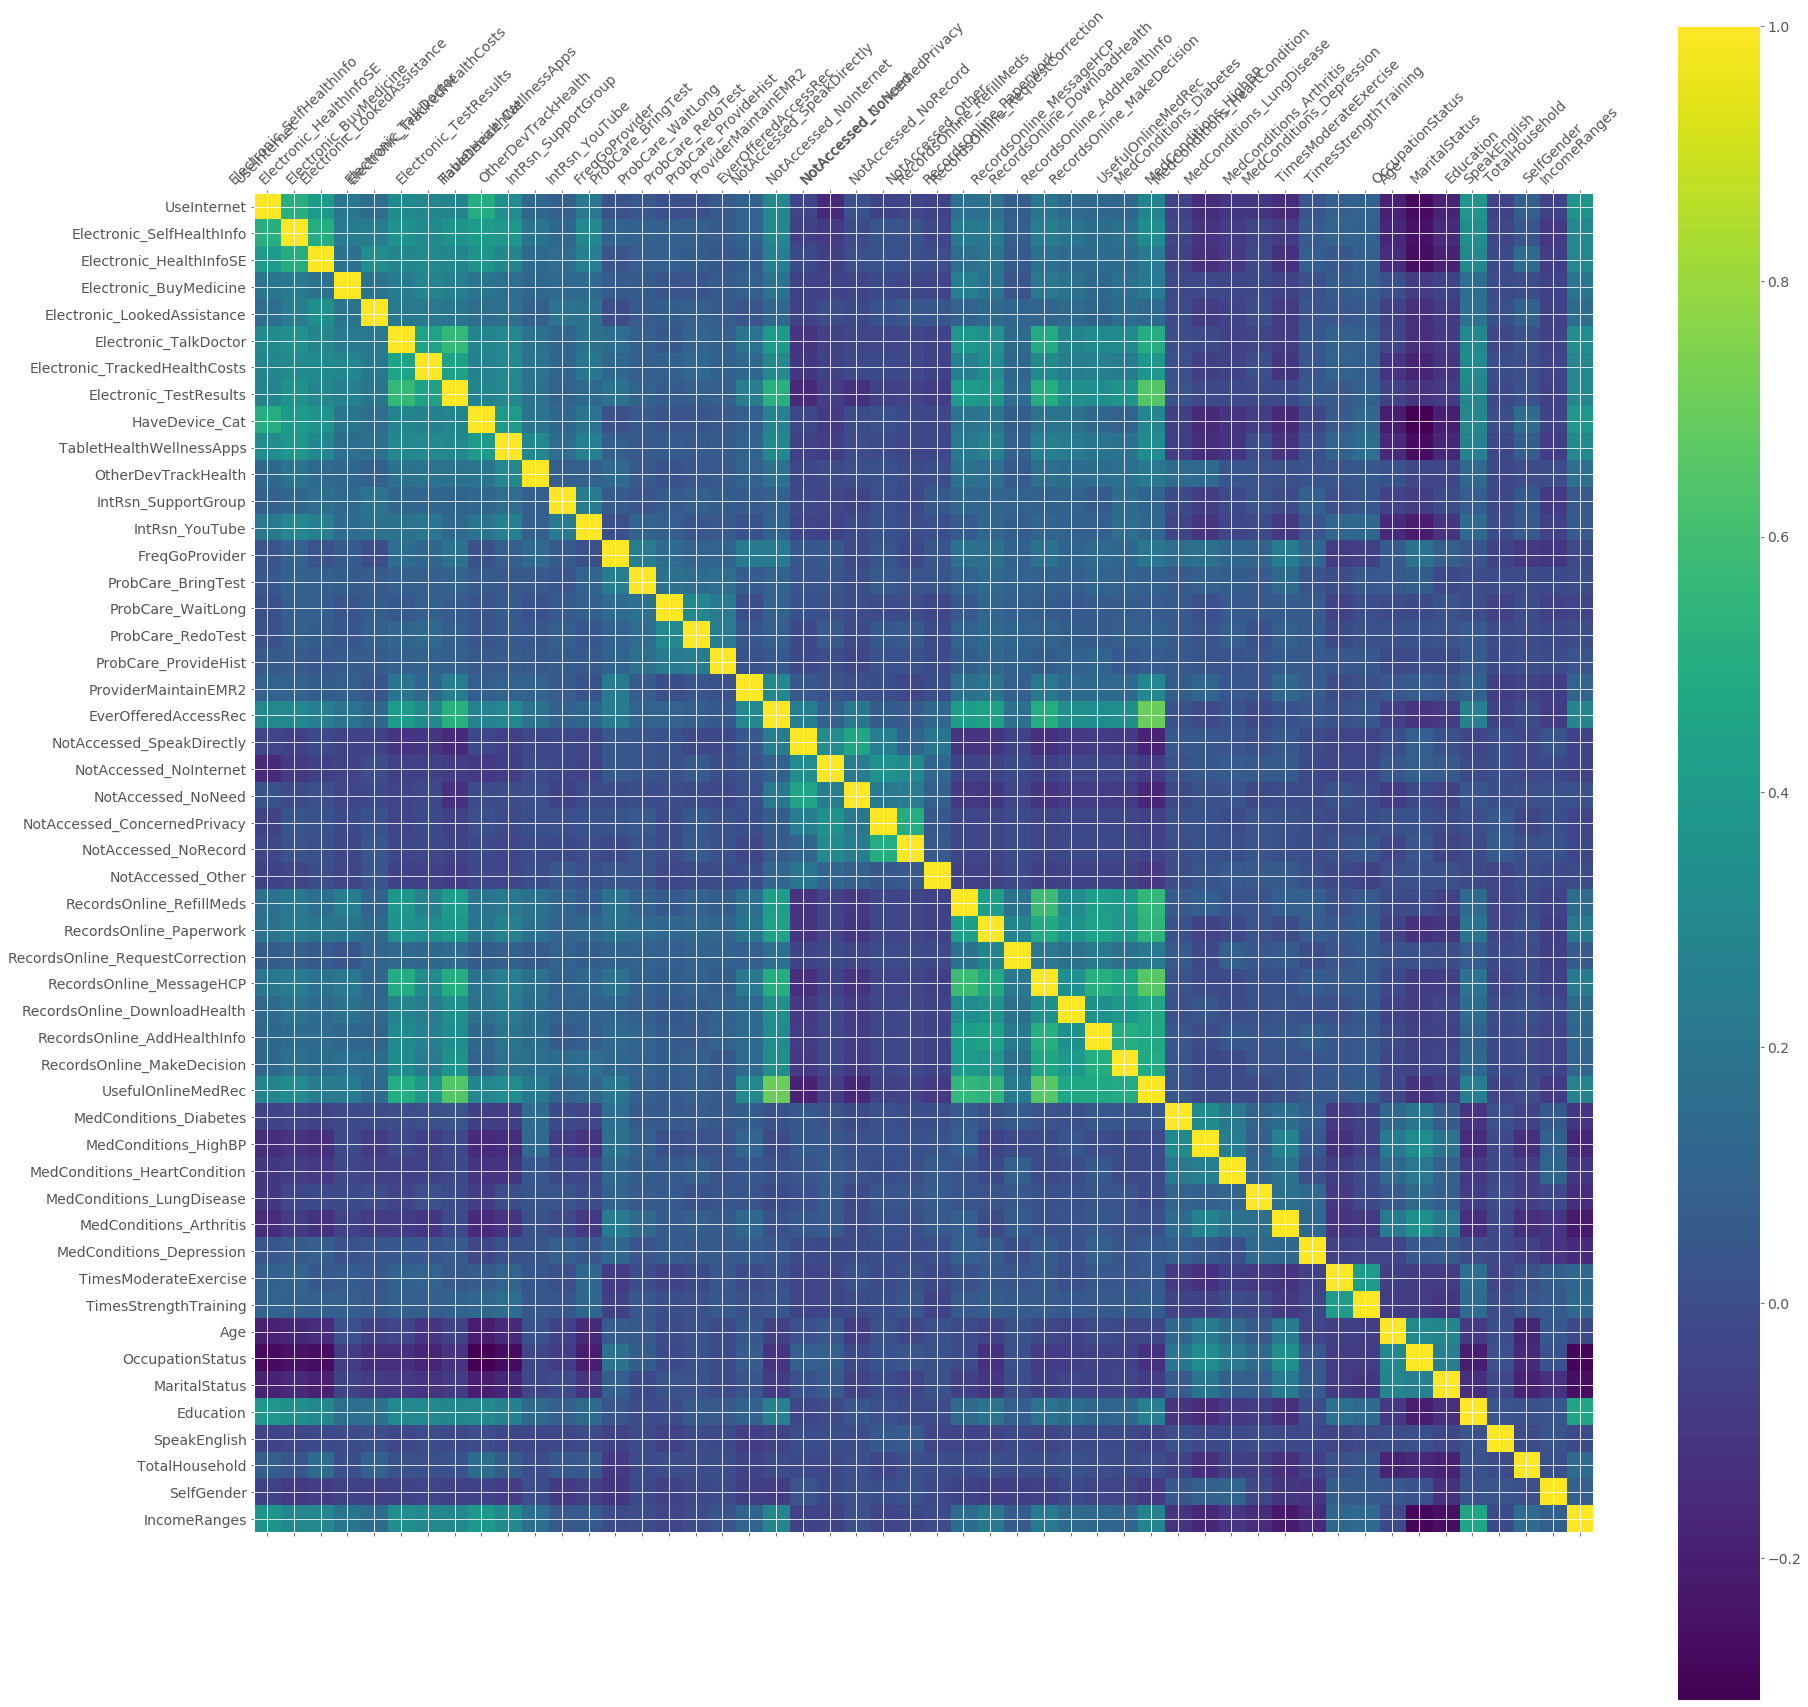

In [142]:
f = plt.figure(figsize=(30, 30))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("correlations.png")

In [168]:
model = RandomForestRegressor(random_state=10, max_depth=100)
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

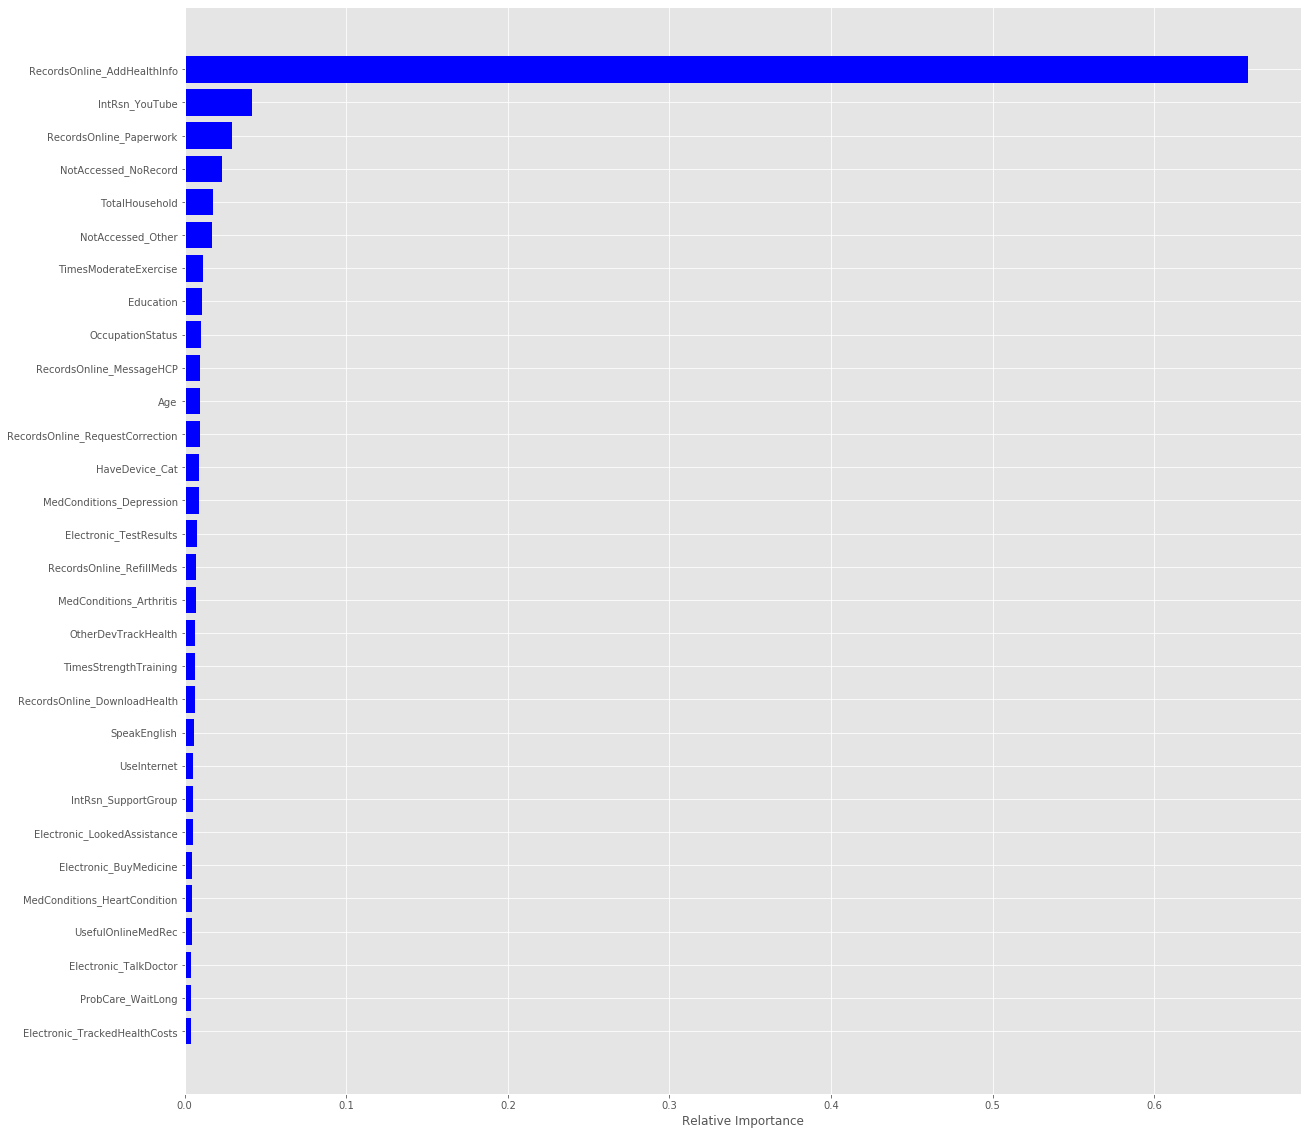

In [250]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:] # top 20 features
#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.savefig("Feature Importances RF.png")

In [252]:
np.argsort(importances)

array([21, 52, 23, 24, 19, 18, 53, 46, 25, 20, 22,  1, 37, 36, 50, 15, 17,
       11,  2, 14, 39, 51, 34,  9,  6, 16,  5, 35, 38,  3,  4, 12,  0, 48,
       32, 43, 10, 40, 28,  7, 41,  8, 30, 44, 31, 45, 47, 42, 27, 49, 26,
       29, 13, 33])

In [253]:
features[indices]

Index(['Electronic_TrackedHealthCosts', 'ProbCare_WaitLong',
       'Electronic_TalkDoctor', 'UsefulOnlineMedRec',
       'MedConditions_HeartCondition', 'Electronic_BuyMedicine',
       'Electronic_LookedAssistance', 'IntRsn_SupportGroup', 'UseInternet',
       'SpeakEnglish', 'RecordsOnline_DownloadHealth', 'TimesStrengthTraining',
       'OtherDevTrackHealth', 'MedConditions_Arthritis',
       'RecordsOnline_RefillMeds', 'Electronic_TestResults',
       'MedConditions_Depression', 'HaveDevice_Cat',
       'RecordsOnline_RequestCorrection', 'Age', 'RecordsOnline_MessageHCP',
       'OccupationStatus', 'Education', 'TimesModerateExercise',
       'NotAccessed_Other', 'TotalHousehold', 'NotAccessed_NoRecord',
       'RecordsOnline_Paperwork', 'IntRsn_YouTube',
       'RecordsOnline_AddHealthInfo'],
      dtype='object')

In [251]:
len(indices)

30

In [244]:
 importances[indices]

array([0.00610215, 0.0061314 , 0.00626331, 0.00718697, 0.00720408,
       0.00770276, 0.00862643, 0.00906526, 0.00919591, 0.00939744,
       0.00977159, 0.01023623, 0.01074403, 0.0112197 , 0.01672174,
       0.01738755, 0.02279595, 0.029411  , 0.0416779 , 0.65776215])

In [218]:
y_train = Y[0:1500]
y_test = Y[1501:1931]

In [176]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [219]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [220]:
y_pred = model.predict(X_test)

In [221]:
y_pred[y_pred>0.5]= 1
y_pred[y_pred<0.5]= 0

In [222]:
confusion_matrix(y_test,y_pred, labels=(1,0))

array([[ 66,   1],
       [  2, 293]])

In [223]:
model.score(X_test, y_test)

0.7798158067619247

In [224]:
X.columns

Index(['UseInternet', 'Electronic_SelfHealthInfo', 'Electronic_HealthInfoSE',
       'Electronic_BuyMedicine', 'Electronic_LookedAssistance',
       'Electronic_TalkDoctor', 'Electronic_TrackedHealthCosts',
       'Electronic_TestResults', 'HaveDevice_Cat', 'TabletHealthWellnessApps',
       'OtherDevTrackHealth', 'IntRsn_SupportGroup', 'IntRsn_YouTube',
       'FreqGoProvider', 'ProbCare_BringTest', 'ProbCare_WaitLong',
       'ProbCare_RedoTest', 'ProbCare_ProvideHist', 'ProviderMaintainEMR2',
       'EverOfferedAccessRec', 'NotAccessed_SpeakDirectly',
       'NotAccessed_NoInternet', 'NotAccessed_NoNeed',
       'NotAccessed_ConcernedPrivacy', 'NotAccessed_NoRecord',
       'NotAccessed_Other', 'RecordsOnline_RefillMeds',
       'RecordsOnline_Paperwork', 'RecordsOnline_RequestCorrection',
       'RecordsOnline_MessageHCP', 'RecordsOnline_DownloadHealth',
       'RecordsOnline_AddHealthInfo', 'RecordsOnline_MakeDecision',
       'UsefulOnlineMedRec', 'MedConditions_Diabetes', 'MedCo

### PCA

In [230]:
pca = PCA(n_components=2)
principalComponents =pca.fit_transform(X[['MedConditions_Diabetes', 'MedConditions_HighBP',
       'MedConditions_HeartCondition', 'MedConditions_LungDisease',
       'MedConditions_Arthritis', 'MedConditions_Depression']])

In [237]:
pca.explained_variance_ratio_

array([0.34044349, 0.19704572])

In [231]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [235]:
principalDf["Loads"] = principalDf["PC1"] + principalDf["PC2"]

In [236]:
principalDf

,PC1,PC2,Loads
0,0.077862,0.413214,0.491076
1,-0.583263,-0.116827,-0.700089
2,0.100742,1.023915,1.124657
3,1.375034,0.457188,1.832222
4,0.136066,-0.531539,-0.395474
...,...,...,...
1926,-0.399686,0.700508,0.300822
1927,0.510042,-0.631355,-0.121312
1928,0.510042,-0.631355,-0.121312
1929,0.510042,-0.631355,-0.121312
